# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | keflavik
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | jinsha
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bamusso
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | tidjikja
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | zeya
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | grytviken
Processin

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,21.20,44,0,1.66,US,1707249185
1,st. john's,47.5649,-52.7093,0.93,97,100,15.95,CA,1707249118
2,keflavik,64.0049,-22.5624,-2.05,74,40,7.72,IS,1707249186
3,port-aux-francais,-49.3500,70.2167,6.02,89,100,11.78,TF,1707249186
4,ribeira grande,38.5167,-28.7000,17.10,94,75,13.89,PT,1707249186


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,21.20,44,0,1.66,US,1707249185
1,st. john's,47.5649,-52.7093,0.93,97,100,15.95,CA,1707249118
2,keflavik,64.0049,-22.5624,-2.05,74,40,7.72,IS,1707249186
3,port-aux-francais,-49.3500,70.2167,6.02,89,100,11.78,TF,1707249186
4,ribeira grande,38.5167,-28.7000,17.10,94,75,13.89,PT,1707249186


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

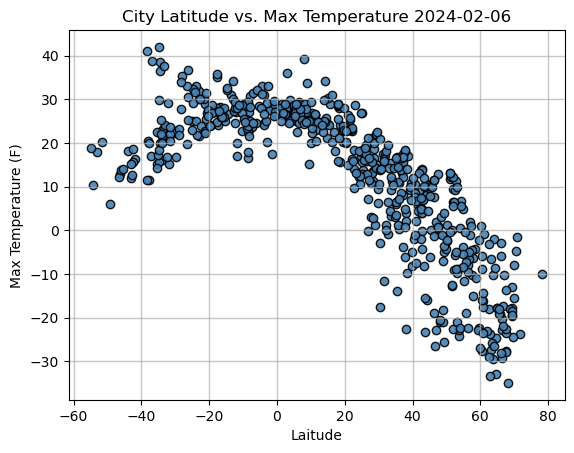

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black", alpha= 0.9)

# Set title
plt_date = pd.to_datetime(city_data_df["Date"][0], unit='s').date()
plt.title(f"City Latitude vs. Max Temperature {plt_date}")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.7)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

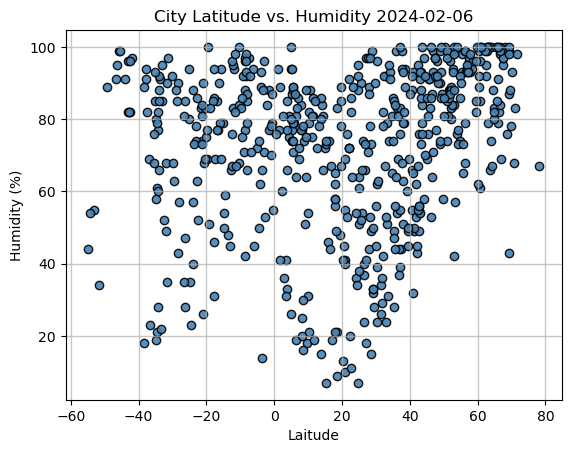

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black", alpha= 0.9)

# Set title
plt.title(f"City Latitude vs. Humidity {plt_date}")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.7)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

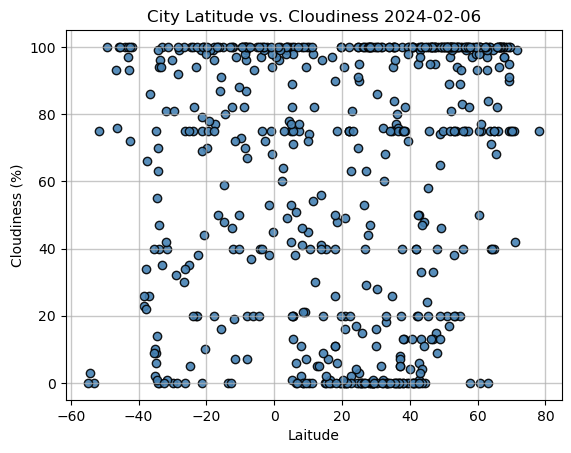

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black", alpha= 0.9)

# Set title
plt.title(f"City Latitude vs. Cloudiness {plt_date}")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.7)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

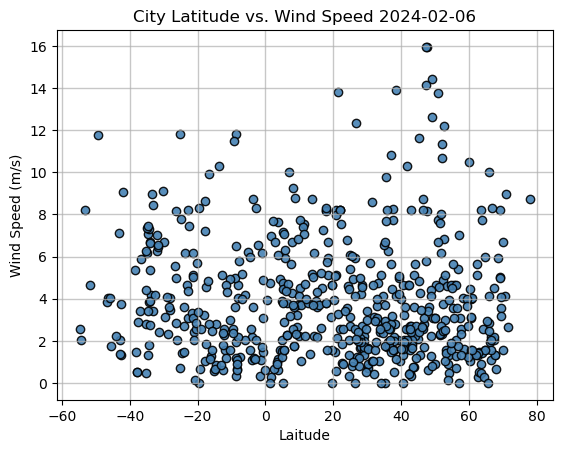

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black", alpha= 0.9)

# Set title
plt.title(f"City Latitude vs. Wind Speed {plt_date}")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (m/s)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.7)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def linear_agression(x_axis, y_axis):
    print(f"The r-squared is : {st.pearsonr(x_axis, y_axis)[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values,"r-")
    return line_eq
    

# Define a fuction for annotating
def annotator(line_eq, a, b):
    plt.annotate(line_eq, (a, b), fontsize=15, color="red")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,21.20,44,0,1.66,US,1707249185
1,st. john's,47.5649,-52.7093,0.93,97,100,15.95,CA,1707249118
2,keflavik,64.0049,-22.5624,-2.05,74,40,7.72,IS,1707249186
4,ribeira grande,38.5167,-28.7000,17.10,94,75,13.89,PT,1707249186
5,jamestown,42.0970,-79.2353,6.40,43,0,2.57,US,1707249063


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,6.02,89,100,11.78,TF,1707249186
8,adamstown,-25.0660,-130.1015,24.95,80,35,0.72,PN,1707249187
11,punta arenas,-53.1500,-70.9167,18.01,55,0,8.23,CL,1707249090
12,namibe,-15.1961,12.1522,25.11,79,100,0.56,AO,1707249171
14,edinburgh of the seven seas,-37.0676,-12.3116,17.09,69,26,3.43,SH,1707249065


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.8674068202012977


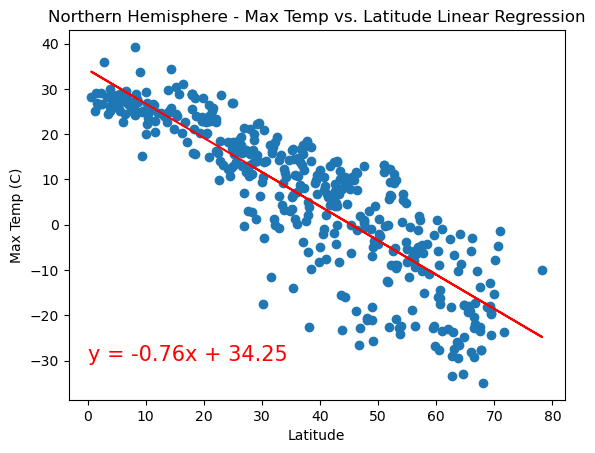

In [56]:
# Linear regression on Northern Hemisphere
# Call linear_agression function
northern_temp_equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call annotator function
annotator(northern_temp_equation, 0, -30)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-squared is : 0.4437678352243882


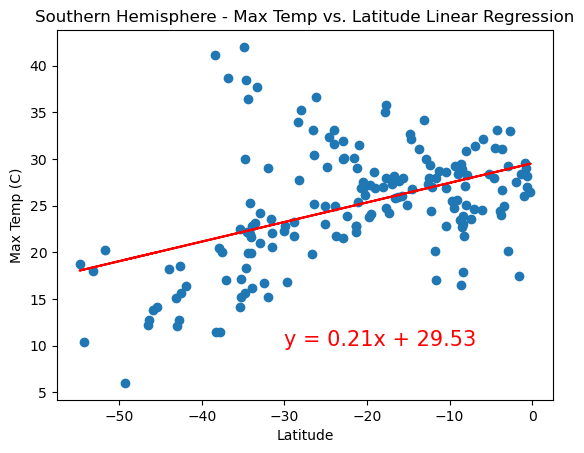

In [57]:
# Linear regression on Southern Hemisphere
# Call linear_agression function
southern_temp_equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Call annotator function
annotator(southern_temp_equation, -30, 10)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere: A strong negative correlation exists between latitude and max temperature for the northern hemisphere.
- Southern Hemisphere: A moderate positive correlation exists between latitude and max temperature for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.4204204106104703


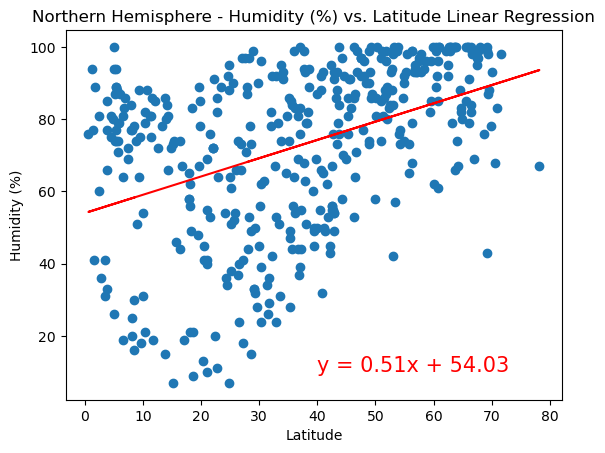

In [60]:
# Northern Hemisphere
# Call linear_agression function
northern_Humidity_equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call annotator function
annotator(northern_Humidity_equation, 40, 10)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-squared is : 0.10268534045999511


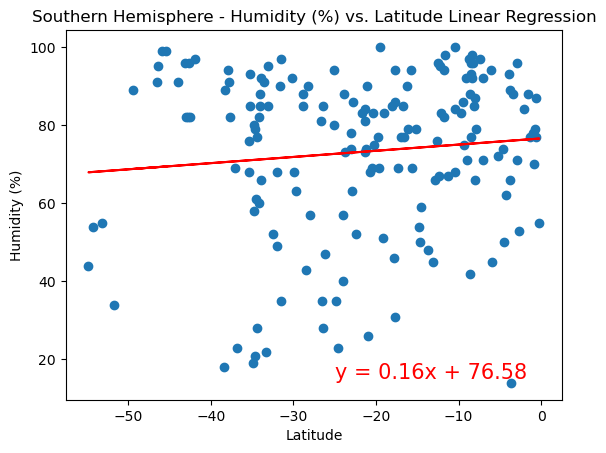

In [64]:
# Southern Hemisphere
# Call linear_agression function
southern_Humidity_equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call annotator function
annotator(southern_Humidity_equation, -25, 15)

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere: A moderate positive correlation exists between latitude and humidity in the northern hemisphere.- Southern Hemisphere: 
A moderate positive correlation exists between latitude and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.30126284211477766


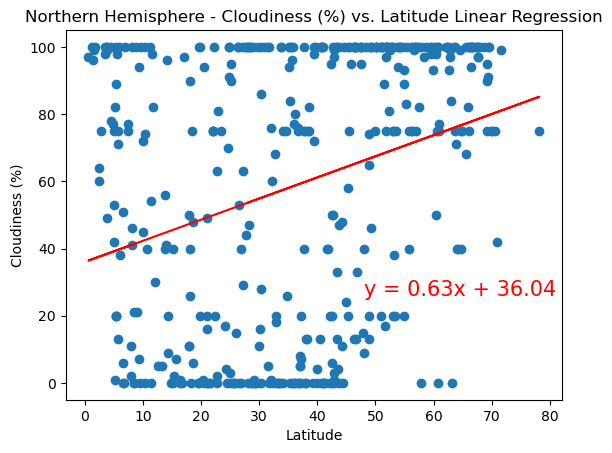

In [69]:
# Northern Hemisphere
# Call linear_agression function
northern_cloudiness_equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call annotator function
annotator(northern_cloudiness_equation, 48, 26)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-squared is : 0.22507556644806323


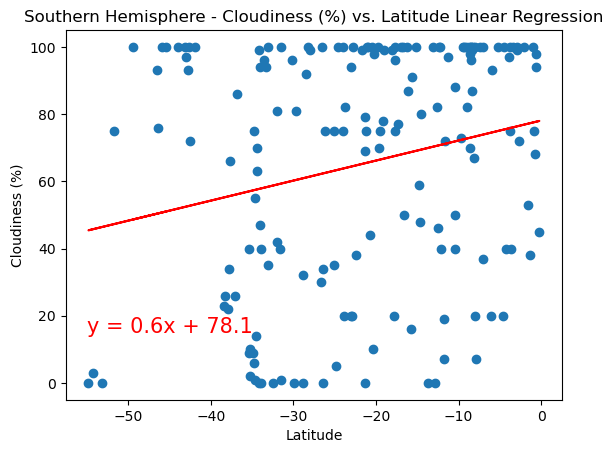

In [72]:
# Southern Hemisphere
# Call linear_agression function
southern_cloudiness_equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call annotator function
annotator(southern_cloudiness_equation, -55, 15)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere: A weak positive correlation exists between latitude and cloudiness in the northern hemisphere.
- Southern Hemisphere: 
A weak positive correlation exists between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : -0.04224772234548604


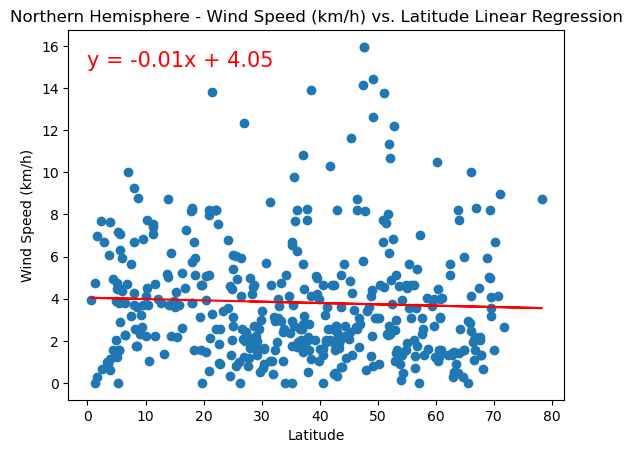

In [74]:
# Northern Hemisphere
# Call linear_agression function
northern_wind_speed_equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call annotator function
annotator(northern_wind_speed_equation, 0, 15)

# Set a title
plt.title("Northern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (km/h)")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-squared is : -0.18242671779534664


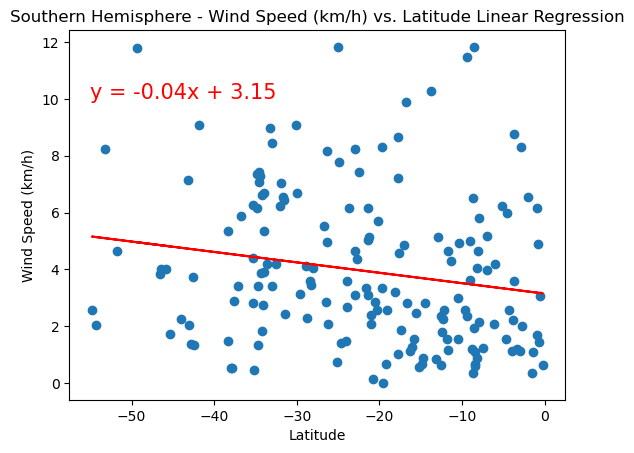

In [78]:
# Southern Hemisphere
# Call linear_agression function
southern_wind_speeds_equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call annotator function
annotator(southern_wind_speeds_equation, -55, 10)

# Set a title
plt.title("Southern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (km/h)")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemisphere: A weak positive correlation exists between latitude and wind speed in the northern hemisphere.- Southern Hemisphere: 
A weak negative correlation exists between latitude and wind speed in the southern hemisphere.